# Cubic Target; Variable Noise

Uniformly distributed $x_i$.

$$
\begin{align}
f(X) & = A \cdot X[0, m_1) + b + \left(\sum_{i = m_1}^{m_1 + m_2} {\beta_i} + {\alpha_i}_{\chi[t_i, \infty)}(X[i]) \right); \\ 
m_2 & = 4; \\
m_1 & \ge 1; \\
s & = 5; \\
Z & = N(0, \sigma^2).
\end{align}
$$


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

## Configuration

In [2]:
N = 250

In [3]:
M = 4

In [4]:
S = 0

In [5]:
SIGMA = np.arange(0.0, 51, 5.0)

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [6]:
experiment0 = ise.CubicWithNoiseExperiment(
    m=M, s=S, sigma=SIGMA[0]
)

### Generate Impact Charts

In [7]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


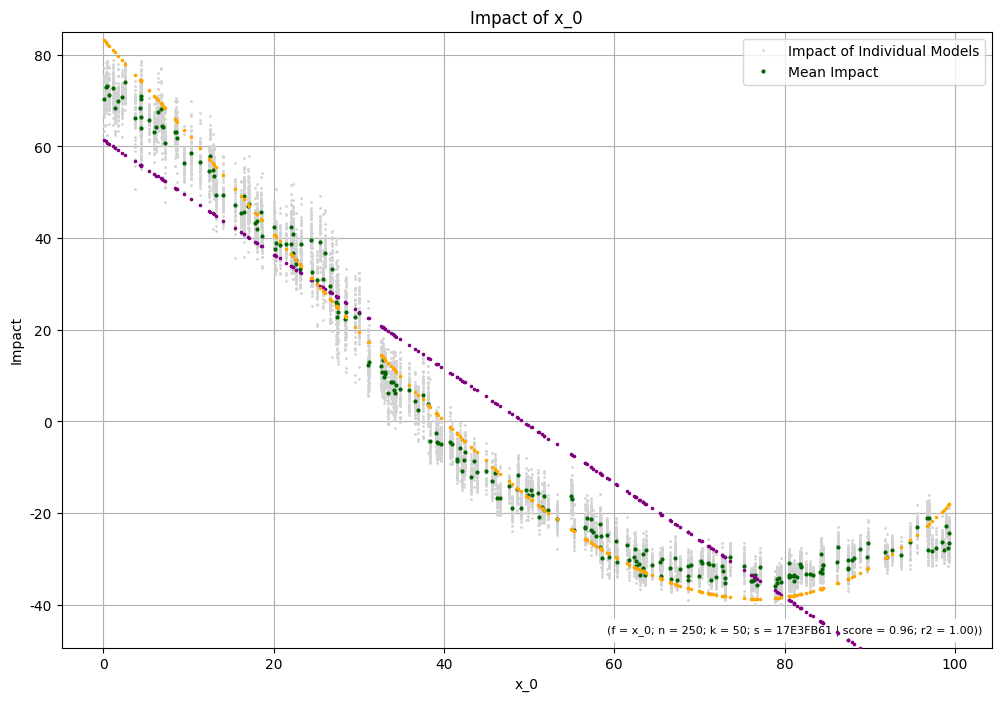

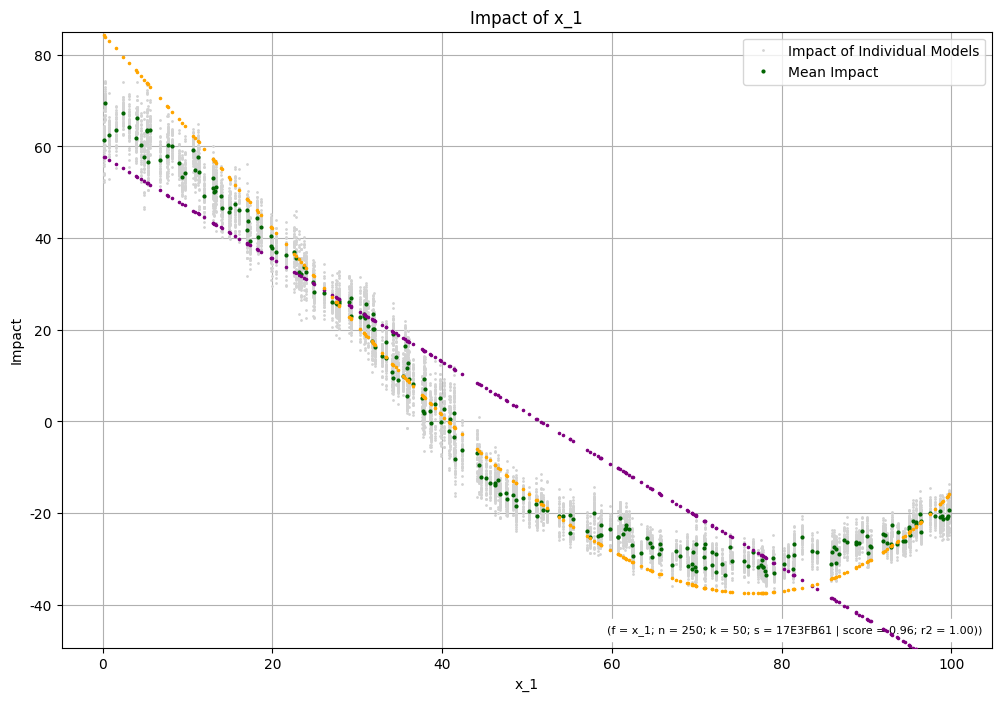

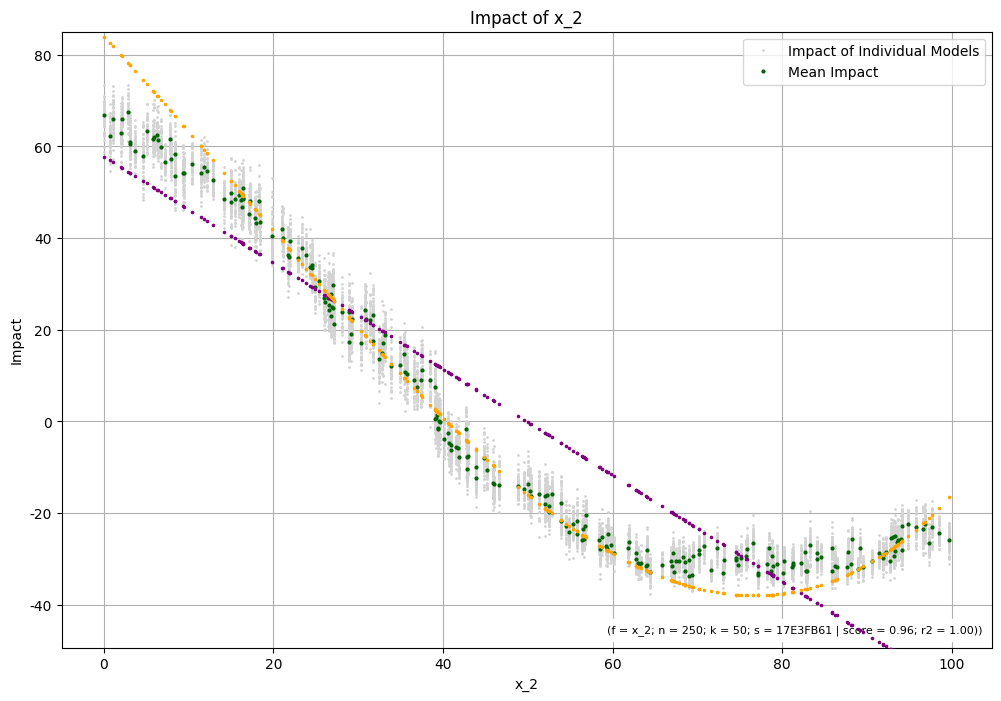

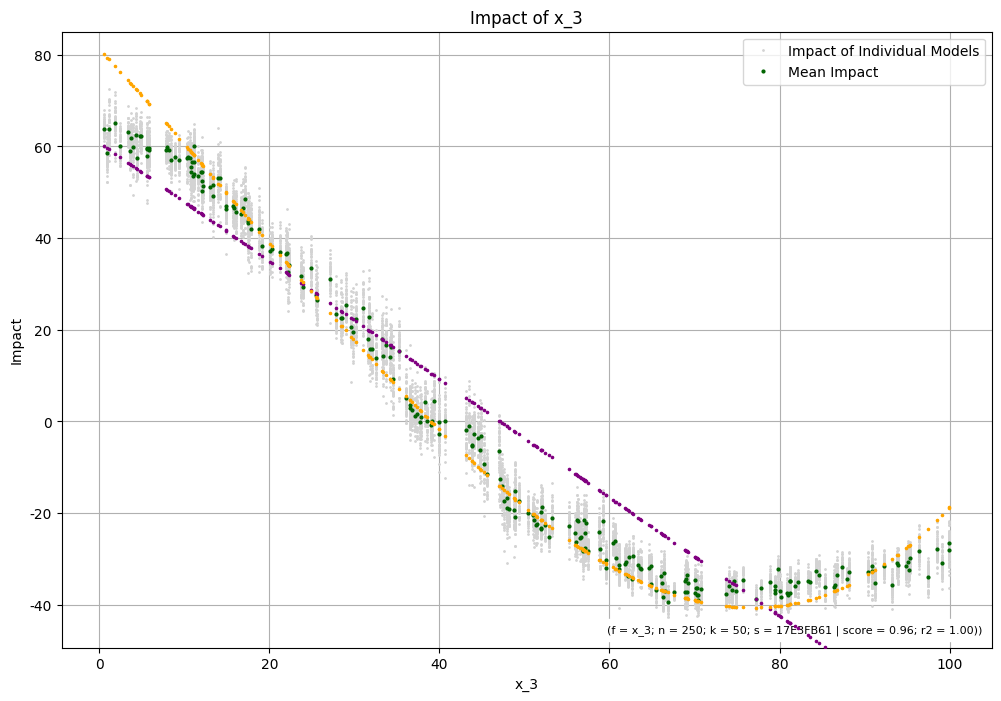

In [8]:
impact_charts = scenario.model_impact_charts(N, linreg_overlay=True)

### Generate Metrics

In [9]:
scenario.model_errors(N, linreg_errors=True)

,metric,x_0,x_1,x_2,x_3,mu_x_i
0,RMSE,4.581317,5.943522,5.585760,5.016629,5.281807
0,MAE,3.812647,4.667773,4.116122,3.708811,4.076338
0,MED_AE,3.448104,3.989746,2.998123,2.818044,3.313504
0,LR_RMSE,15.031181,16.030333,14.655923,14.756767,15.118551
0,LR_MAE,12.251195,13.958401,12.468566,12.362046,12.760052
0,LR_MED_AE,12.241135,13.933626,12.459098,12.065989,12.674962


In [10]:
scenario.linreg_r2(N), scenario.model_r2(N)

(0.8287405226085102, 0.9958200002383714)

## A Multi-Scenario Experiment

In [11]:
experiment = ise.CubicWithNoiseExperiment(
    m=M, s=S, sigma=SIGMA
)

In [12]:
experiment.model_errors(N, linreg_errors=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,metric,x_0,x_1,x_2,x_3,mu_x_i,m,s,sigma,IM_R2,LR_R2
0,RMSE,4.581317,5.943522,5.585760,5.016629,5.281807,4,0,0.0,0.995820,0.828741
0,MAE,3.812647,4.667773,4.116122,3.708811,4.076338,4,0,0.0,0.995820,0.828741
0,MED_AE,3.448104,3.989746,2.998123,2.818044,3.313504,4,0,0.0,0.995820,0.828741
0,LR_RMSE,15.031181,16.030333,14.655923,14.756767,15.118551,4,0,0.0,0.995820,0.828741
0,LR_MAE,12.251195,13.958401,12.468566,12.362046,12.760052,4,0,0.0,0.995820,0.828741
...,...,...,...,...,...,...,...,...,...,...,...
0,MAE,6.119268,5.137646,8.180970,7.518720,6.739151,4,0,50.0,0.741043,0.567903
0,MED_AE,5.164494,3.798718,7.689644,6.787055,5.859978,4,0,50.0,0.741043,0.567903
0,LR_RMSE,15.032379,16.270276,14.919383,14.791944,15.253496,4,0,50.0,0.741043,0.567903
0,LR_MAE,12.288666,13.798191,12.839565,12.524044,12.862617,4,0,50.0,0.741043,0.567903


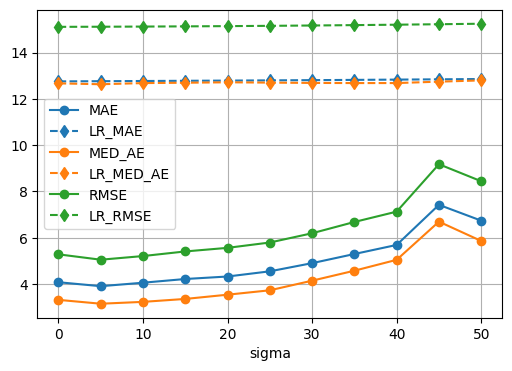

In [21]:
ax = experiment.plot_model_errors(N, x_col="sigma", y_col="mu_x_i", figsize=(6, 4))

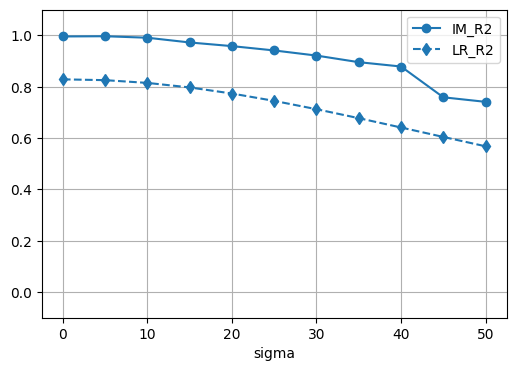

In [14]:
ax = experiment.plot_r2(N, x_col="sigma", figsize=(6, 4))